In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('shopping_dataset.csv')
# We possess a dataset concerning shopping behavior, prompting an exploratory data analysis endeavor. 
# Initially, we'll inspect the dataset to discern potential avenues for further analysis.
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [19]:
# Let's see the size of our data
df.shape

(3900, 18)

In [16]:
# Looks like the data is in good shape, no typos here!
# Now, let's check out the columns and see how much data we've got for each one.
df.count()

Customer ID               3900
Age                       3900
Gender                    3900
Item Purchased            3900
Category                  3900
Purchase Amount (USD)     3900
Location                  3900
Size                      3900
Color                     3900
Season                    3900
Review Rating             3900
Subscription Status       3900
Shipping Type             3900
Discount Applied          3900
Promo Code Used           3900
Previous Purchases        3900
Payment Method            3900
Frequency of Purchases    3900
dtype: int64

In [20]:
# Great news! There are no null values, which is a fantastic start.
# Now, let's delve into the statistics for each column.
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# The values seem to be evenly distributed. We can also verify this by examining the statistics, which indicate no significant outliers.

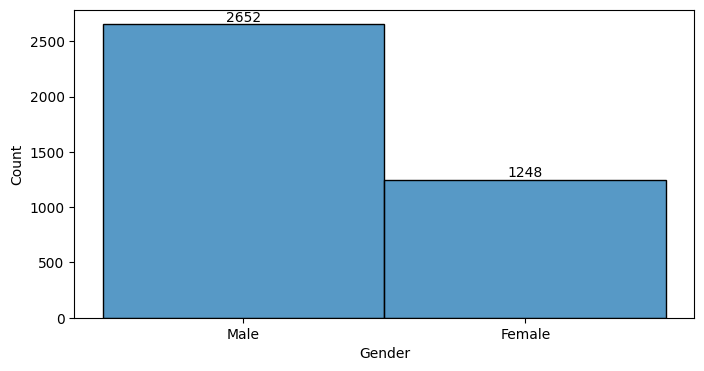

In [26]:
# Since the data is already in nearly perfect condition, it's time to dive into some analysis.
# Let's start by exploring shopping behavior across different genders.
# We'll begin with a histogram to visualize the distribution.
plt.figure(figsize=(8, 4))
ax=sns.histplot(df['Gender'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


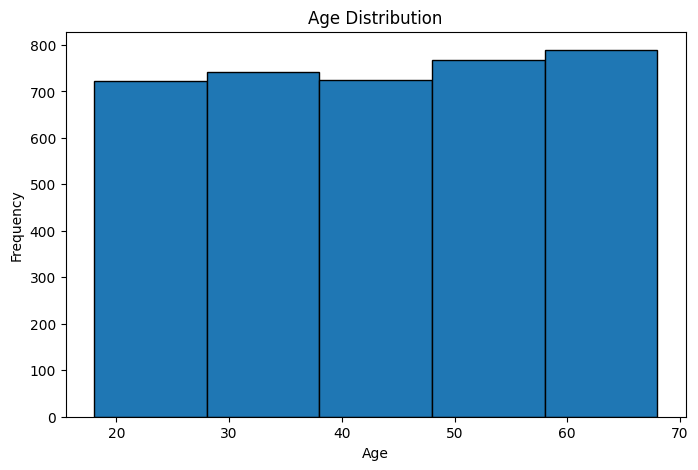

In [40]:
# We notice that the number of males is significantly higher than that of females.
# For our next analysis, let's examine how different age groups engage in shopping.
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=range(df['Age'].min(), df['Age'].max(), 10), edgecolor='black')  # bins from
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Age')

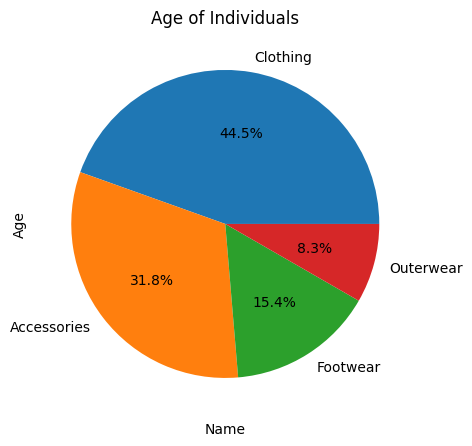

In [50]:
# It's evident that the frequency is similar for all age groups, ranging between 700 and 800.
# Now, since we have a category column in our dataset, let's determine which category has the highest sales.
plt.figure(figsize=(8, 5))
df['Category'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.title('Sales by Category')


Text(0.5, 1.0, 'Sales by Category')

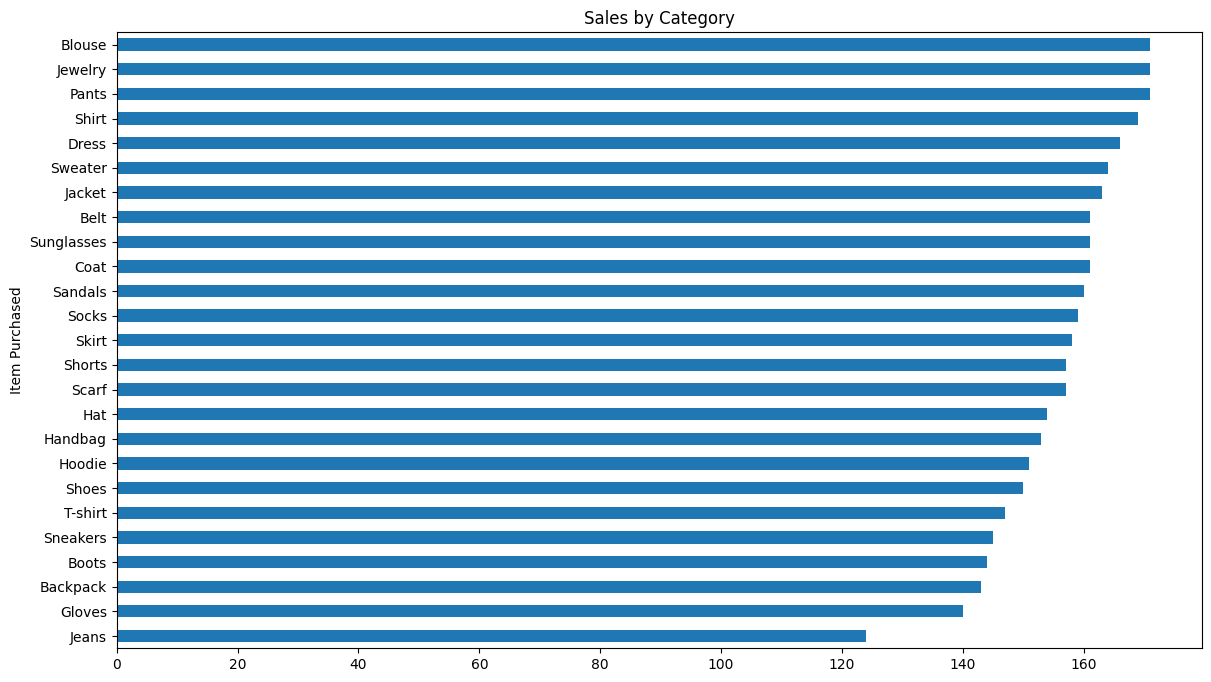

In [56]:
# The highest selling category is clothing, accounting for 44.5% of sales, while Outerwear has the lowest sales at 8.3%.

# Now, let's delve deeper and identify the specific items that have achieved the highest sales in our dataset.

plt.figure(figsize=(14, 8))
df['Item Purchased'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Sales by Items')

In [58]:
# It's evident that blouse, jewelry, and pants are the top three best-selling items.

# Moving forward, let's conduct some multivariate analysis, starting with examining revenue per category.

df.groupby('Category')['Purchase Amount (USD)'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

Text(0, 0.5, 'Sales')

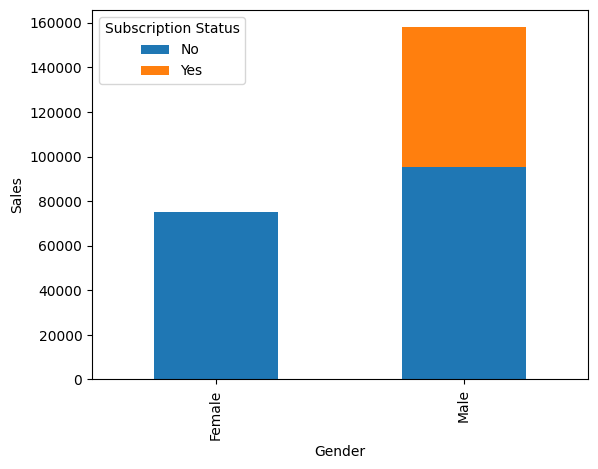

In [69]:
# As anticipated, clothing has generated the highest revenue.

# Now, let's delve into analyzing customer behavior.

df.groupby(['Gender','Subscription Status'])['Purchase Amount (USD)'].sum().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Sales')

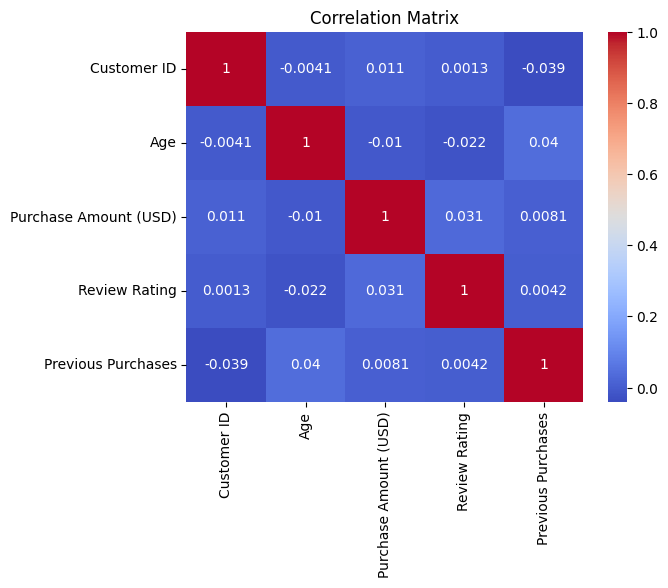

In [74]:
# Interestingly, there are no female subscribers, and sales generated by male subscribers comprise nearly half of the total sales generated by males alone.

# Next, let's examine the correlations between different variables in the dataset.

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# The data exhibit very weak or no correlation at all, suggesting a random and potentially unrealistic distribution.
